<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/2_%E4%B8%8D%E5%90%8CSVM%E6%A0%B8%E5%87%BD%E6%95%B0%E6%95%88%E6%9E%9C%E6%AF%94%E8%BE%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import time
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [4]:
## 读取数据
# 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'sepal length', u'sepal width', u'petal length', u'petal width'
path = 'iris.data'  # 数据文件路径
data = pd.read_csv(path, header=None)
x, y = data[list(range(4))], data[4]
y = pd.Categorical(y).codes
x = x[[0, 1]]

In [5]:
## 数据分割
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=28, train_size=0.6)

In [7]:
## 数据SVM分类器构建
svm1 = SVC(C=1, kernel='linear')
svm2 = SVC(C=1, kernel='rbf')
svm3 = SVC(C=1, kernel='poly')
svm4 = SVC(C=1, kernel='sigmoid')

## 模型训练
t0=time.time()
svm1.fit(x_train, y_train)
t1=time.time()
svm2.fit(x_train, y_train)
t2=time.time()
svm3.fit(x_train, y_train)
t3=time.time()
svm4.fit(x_train, y_train)
t4=time.time()

In [9]:
### 效果评估
svm1_score1 = accuracy_score(y_train, svm1.predict(x_train))
svm1_score2 = accuracy_score(y_test, svm1.predict(x_test))

svm2_score1 = accuracy_score(y_train, svm2.predict(x_train))
svm2_score2 = accuracy_score(y_test, svm2.predict(x_test))

svm3_score1 = accuracy_score(y_train, svm3.predict(x_train))
svm3_score2 = accuracy_score(y_test, svm3.predict(x_test))

svm4_score1 = accuracy_score(y_train, svm4.predict(x_train))
svm4_score2 = accuracy_score(y_test, svm4.predict(x_test))

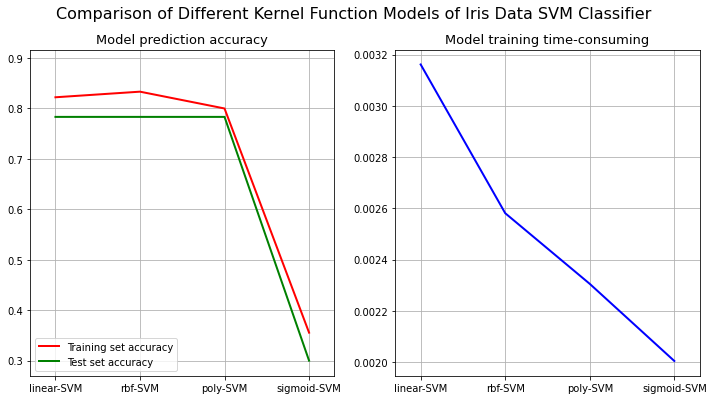

In [10]:
## 画图
x_tmp = [0,1,2,3]
t_score = [t1 - t0, t2-t1, t3-t2, t4-t3]
y_score1 = [svm1_score1, svm2_score1, svm3_score1, svm4_score1]
y_score2 = [svm1_score2, svm2_score2, svm3_score2, svm4_score2]

plt.figure(facecolor='w', figsize=(12,6))


plt.subplot(121)
plt.plot(x_tmp, y_score1, 'r-', lw=2, label=u'Training set accuracy')
plt.plot(x_tmp, y_score2, 'g-', lw=2, label=u'Test set accuracy')
plt.xlim(-0.3, 3.3)
plt.ylim(np.min((np.min(y_score1), np.min(y_score2)))*0.9, np.max((np.max(y_score1), np.max(y_score2)))*1.1)
plt.legend(loc = 'lower left')
plt.title(u'Model prediction accuracy', fontsize=13)
plt.xticks(x_tmp, [u'linear-SVM', u'rbf-SVM', u'poly-SVM', u'sigmoid-SVM'], rotation=0)
plt.grid(b=True)

plt.subplot(122)
plt.plot(x_tmp, t_score, 'b-', lw=2, label=u'Model training time')
plt.title(u'Model training time-consuming', fontsize=13)
plt.xticks(x_tmp, [u'linear-SVM', u'rbf-SVM', u'poly-SVM', u'sigmoid-SVM'], rotation=0)
plt.xlim(-0.3, 3.3)
plt.grid(b=True)

plt.suptitle(u'Comparison of Different Kernel Function Models of Iris Data SVM Classifier', fontsize=16)

plt.show()

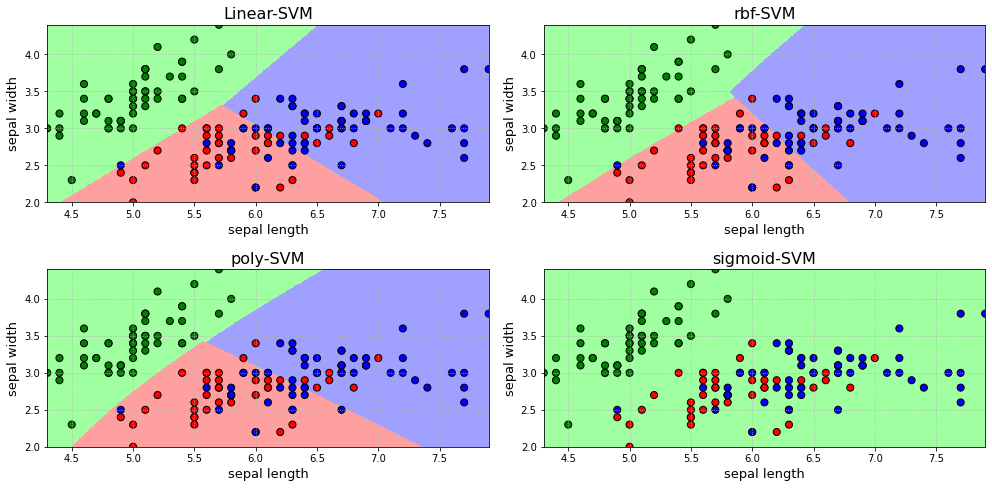

In [11]:
### 预测结果画图
### 画图比较
N = 500
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()

t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
grid_show = np.dstack((x1.flat, x2.flat))[0] # 测试点

## 获取各个不同算法的测试值
svm1_grid_hat = svm1.predict(grid_show)
svm1_grid_hat = svm1_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

svm2_grid_hat = svm2.predict(grid_show)
svm2_grid_hat = svm2_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

svm3_grid_hat = svm3.predict(grid_show)
svm3_grid_hat = svm3_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

svm4_grid_hat = svm4.predict(grid_show)
svm4_grid_hat = svm4_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

## 画图
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.figure(facecolor='w', figsize=(14,7))

### svm
plt.subplot(221)
## 区域图
plt.pcolormesh(x1, x2, svm1_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'Linear-SVM', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(222)
## 区域图
plt.pcolormesh(x1, x2, svm2_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'rbf-SVM', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(223)
## 区域图
plt.pcolormesh(x1, x2, svm3_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'poly-SVM', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(224)
## 区域图
plt.pcolormesh(x1, x2, svm4_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'sigmoid-SVM', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.show()

In [12]:
## 数据SVM分类器构建
svm_1 = SVC(C=0.1, kernel='rbf')
svm_2 = SVC(C=1, kernel='rbf')
svm_3 = SVC(C=10, kernel='rbf')
svm_4 = SVC(C=100, kernel='rbf')
svm_5 = SVC(C=500, kernel='rbf')
svm_6 = SVC(C=100000, kernel='rbf')
## 模型训练
t0=time.time()
svm_1.fit(x_train, y_train)
t1=time.time()
svm_2.fit(x_train, y_train)
t2=time.time()
svm_3.fit(x_train, y_train)
t3=time.time()
svm_4.fit(x_train, y_train)
t4=time.time()
svm_5.fit(x_train, y_train)
t5=time.time()
svm_6.fit(x_train, y_train)
t6=time.time()

In [14]:
### 效果评估
svm1_score1 = accuracy_score(y_train, svm_1.predict(x_train))
svm1_score2 = accuracy_score(y_test, svm_1.predict(x_test))

svm2_score1 = accuracy_score(y_train, svm_2.predict(x_train))
svm2_score2 = accuracy_score(y_test, svm_2.predict(x_test))

svm3_score1 = accuracy_score(y_train, svm_3.predict(x_train))
svm3_score2 = accuracy_score(y_test, svm_3.predict(x_test))

svm4_score1 = accuracy_score(y_train, svm_4.predict(x_train))
svm4_score2 = accuracy_score(y_test, svm_4.predict(x_test))

svm5_score1 = accuracy_score(y_train, svm_5.predict(x_train))
svm5_score2 = accuracy_score(y_test, svm_5.predict(x_test))

svm6_score1 = accuracy_score(y_train, svm_6.predict(x_train))
svm6_score2 = accuracy_score(y_test, svm_6.predict(x_test))

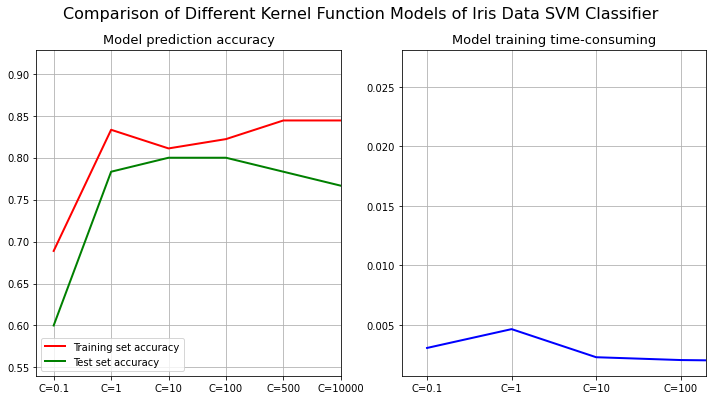

In [15]:
## 画图
x_tmp = [0,1,2,3, 4, 5]
t_score = [t1 - t0, t2-t1, t3-t2, t4-t3, t5-t4, t6-t5]
y_score1 = [svm1_score1, svm2_score1, svm3_score1, svm4_score1, svm5_score1, svm6_score1]
y_score2 = [svm1_score2, svm2_score2, svm3_score2, svm4_score2, svm5_score2, svm6_score2]

plt.figure(facecolor='w', figsize=(12,6))


plt.subplot(121)
plt.plot(x_tmp, y_score1, 'r-', lw=2, label=u'Training set accuracy')
plt.plot(x_tmp, y_score2, 'g-', lw=2, label=u'Test set accuracy')
plt.xlim(-0.3, 3.3)
plt.ylim(np.min((np.min(y_score1), np.min(y_score2)))*0.9, np.max((np.max(y_score1), np.max(y_score2)))*1.1)
plt.legend(loc = 'lower left')
plt.title(u'Model prediction accuracy', fontsize=13)
plt.xticks(x_tmp, [u'C=0.1', u'C=1', u'C=10', u'C=100', u'C=500', u'C=10000'], rotation=0)
plt.grid(b=True)

plt.subplot(122)
plt.plot(x_tmp, t_score, 'b-', lw=2, label=u'Model training time')
plt.title(u'Model training time-consuming', fontsize=13)
plt.xticks(x_tmp, [u'C=0.1', u'C=1', u'C=10', u'C=100', u'C=500', u'C=10000'], rotation=0)
plt.xlim(-0.3, 3.3)
plt.grid(b=True)

plt.suptitle(u'Comparison of Different Kernel Function Models of Iris Data SVM Classifier', fontsize=16)

plt.show()

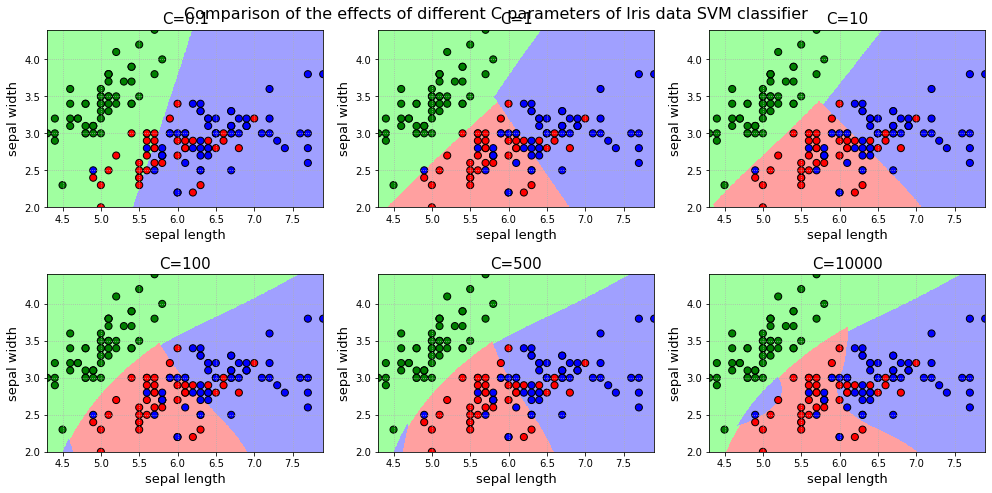

In [17]:
## 预测结果画图
### 画图比较
N = 500
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()

t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, N)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
grid_show = np.dstack((x1.flat, x2.flat))[0] # 测试点

## 获取各个不同算法的测试值
svm1_grid_hat = svm_1.predict(grid_show)
svm1_grid_hat = svm1_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

svm2_grid_hat = svm_2.predict(grid_show)
svm2_grid_hat = svm2_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

svm3_grid_hat = svm_3.predict(grid_show)
svm3_grid_hat = svm3_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

svm4_grid_hat = svm_4.predict(grid_show)
svm4_grid_hat = svm4_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

svm5_grid_hat = svm_5.predict(grid_show)
svm5_grid_hat = svm5_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

svm6_grid_hat = svm_6.predict(grid_show)
svm6_grid_hat = svm6_grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

## 画图
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.figure(facecolor='w', figsize=(14,7))

### svm
plt.subplot(231)
## 区域图
plt.pcolormesh(x1, x2, svm1_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'C=0.1', fontsize=15)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(232)
## 区域图
plt.pcolormesh(x1, x2, svm2_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'C=1', fontsize=15)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(233)
## 区域图
plt.pcolormesh(x1, x2, svm3_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'C=10', fontsize=15)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(234)
## 区域图
plt.pcolormesh(x1, x2, svm4_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'C=100', fontsize=15)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(235)
## 区域图
plt.pcolormesh(x1, x2, svm5_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'C=500', fontsize=15)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)

plt.subplot(236)
## 区域图
plt.pcolormesh(x1, x2, svm6_grid_hat, cmap=cm_light)
## 所以样本点
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
## 测试数据集
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
## lable列表
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'C=10000', fontsize=15)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)


plt.suptitle(u'Comparison of the effects of different C parameters of Iris data SVM classifier', fontsize=16)
plt.show()
